<!--HEADER-->
*[Guia de aulas da disciplina de Modelagem Matemática](https://github.com/rmsrosa/modelagem_matematica) do [IM-UFRJ](https://www.im.ufrj.br).*

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/07.00-Aula7.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/07.00-Aula7.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;
<a href="https://rmsrosa.github.io/modelagem_matematica/aulas/07.00-Aula7.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;

[<- Aula 6: Regressão semi-linear, ajustes de ordem mais alta e critérios de seleção do ajuste](06.00-Aula6.ipynb) | [Página Inicial](00-Sumario.ipynb) | [Aula 8: O pêndulo com ângulos grandes, um pouco de EDO e simulações ->](08.00-Aula8.ipynb)

---


# Aula 7: Otimização e regressão não-linear

### Objetivos

- Ajustar curvas que não podem ser transformadas em regressões lineares.

- Explorar métodos de otimização

## Importando bibliotecas e definindo funções a serem usadas abaixo

In [1]:
from os import path

import numpy as np
import pandas as pd
import scipy as sp
from scipy import optimize

import matplotlib.pyplot as plt

import io, base64
from IPython.display import Image, HTML

def path_files_aula2(filename):
    return path.join('..', 'dados', 'agua', filename)

def path_files_aula7(filename):
    return path.join('..', 'dados', 'ajustes', filename)

## Otimização

- **Otimizar:** melhorar a eficiência, reduzir custos, etc.
- **Envolve:**
    - Definir uma **função objetivo**, a ser minimizada (ou maximizada);
    - Incorporar **restrições** a essa função objetivo;
    - **Métodos** para encontrar o(s) **mínimo(s)** (ou **máximo(s)**) da função objetivo.
- **Exemplos:** 
    - Encontrar o retângulo de maior área com um certo perímetro dado.
    - Determinar o menor caminho passando por determinados pontos uma única vez (caixeiro viajante).
    - Maximir a produção de energia (elétrica, solar, eólica, ...).
    - Minimizar perdas em vários processos.
    - **Mínimos quadrados:** 
        - Função objetivo a ser minimizada é a **soma dos quadrado dos resíduos**.
        - Ou pode ser vista como maximização da **verossimilhança**.

## Otimização com o python

O pacote [scipy.optimize (Optimization and Root Finding)](https://docs.scipy.org/doc/scipy/reference/optimize.html) possui várias funções de otimização:
- [minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html): minimização de funções escalares de uma variável. 
- [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html): minimização (local) com ou sem restrições de funções objetivo escalares de uma ou mais variáveis.
- [least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html): mínimos quadrados não-linear, com ou sem restrições.
- [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html): ajuste de curvas baseado na função de mínimos quadrados não-linear acima.
- [nnls](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.nnls.html) e [lsq_linear](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.lsq_linear.html): mínimos quadrados linear com restrições.
- [linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html): minimização de funções objetivo lineares, com restrições lineares, para programação linear.
- [basinhopping](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html), [brute](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brute.html), [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html), [shgo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html), [dual_annealing](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html): algoritmos variados de minimização *global*.

**Observação:** O [numpy.linalg.lstsq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) que temos usado é uma implementação direta do método de mínimos quadrados sem restrição.

### Métodos implementados na função minimize

A função `minimize` implementa vários métodos de minimização da função objetivo. 

Veja resumo em [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) e detalhes no link de cada método:

- [minimize(method=’Nelder-Mead’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html)
- [minimize(method=’Powell’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-powell.html)
- [minimize(method=’CG’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-cg.html)
- [minimize(method=’BFGS’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html)
- [minimize(method=’Newton-CG’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-newtoncg.html)
- [minimize(method=’L-BFGS-B’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html)
- [minimize(method=’TNC’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-tnc.html)
- [minimize(method=’COBYLA’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-cobyla.html)
- [minimize(method=’SLSQP’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html)
- [minimize(method=’trust-constr’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-trustconstr.html)
- [minimize(method=’dogleg’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-dogleg.html)
- [minimize(method=’trust-ncg’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-trustncg.html)
- [minimize(method=’trust-krylov’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-trustkrylov.html)
- [minimize(method=’trust-exact’)](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-trustexact.html)

### Minimizando uma função escalar

Vamos fazer um exemplo simples para achar o mínimo de uma função escalar.

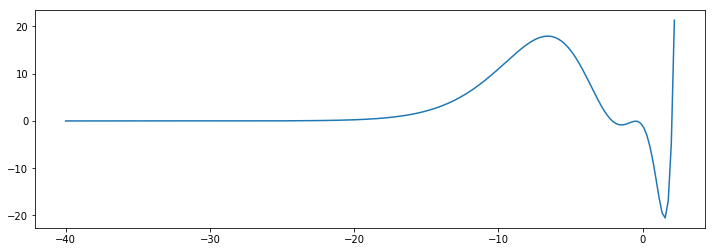

In [2]:
def f(x,a):
    return np.exp(2*x/3)*(x**4 - a**2*x**2 + x**3 - a**2*x - 1)

a = 2.0
plt.figure(figsize=(12,4))
x = np.linspace(-40,2.2, 200)
y = f(x,a)
plt.plot(x,y)
plt.show()

### Otimização com chute inicial na origem

In [3]:
resultado = optimize.minimize(f, 0, args=(a))
print(resultado)

      fun: -20.58433479885371
 hess_inv: array([[0.01119154]])
      jac: array([2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 4
     njev: 10
   status: 0
  success: True
        x: array([1.52505375])


### Gráfico

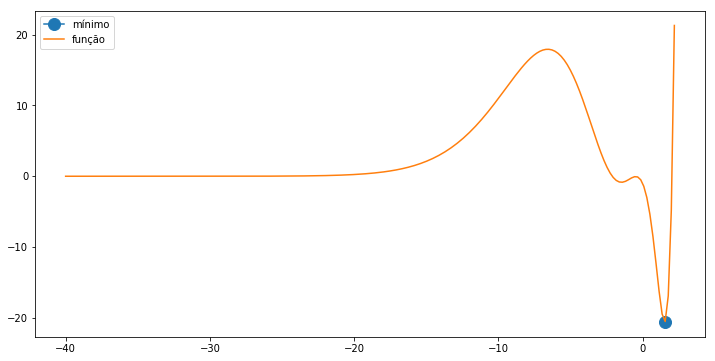

In [4]:
plt.figure(figsize=(12,6))
plt.plot(resultado.x, resultado.fun, marker='o', markersize=12, label='mínimo')
plt.plot(x,y, label='função')
plt.legend()
plt.show()

### Vários chutes iniciais

In [5]:
pontos_iniciais = [-10, -2, 2]
resultados = [optimize.minimize(f, x0, args=(a)) for x0 in iter(pontos_iniciais)]

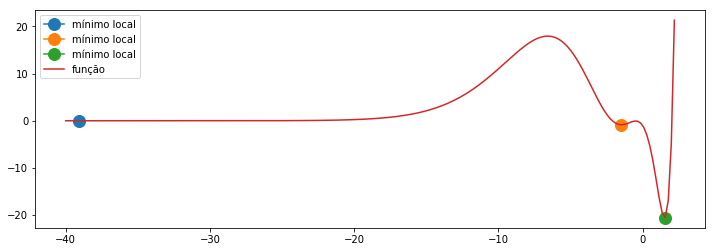

In [6]:
plt.figure(figsize=(12,4))
for resultado in resultados:
    plt.plot(resultado.x, resultado.fun, marker='o', markersize=12, label='mínimo local')
plt.plot(x,y, label='função')
plt.legend()
plt.show()

### Informações

In [7]:
resultados[0]

      fun: 1.1184006422119247e-05
 hess_inv: array([[98930.44841616]])
      jac: array([6.30128261e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 19
     njev: 20
   status: 0
  success: True
        x: array([-39.04732913])

### Em busca do máximo global

Usando o método `basinhopping` com três chutes iniciais diferentes.

In [8]:
print(optimize.basinhopping(f, 2, minimizer_kwargs={'args': (a)}).x[0])
print(optimize.basinhopping(f, -5, minimizer_kwargs={'args': (a)}).x[0])
print(optimize.basinhopping(f, -10, minimizer_kwargs={'args': (a)}).x[0])

1.52505372952498
1.5250537297425504
-41.50903470773512


## Ajuste de curva via mínimos quadrados não-linear

A função objetivo de **mínimos quadrados não linear** é uma versão não linear dos mínimos quadrados.

Mais precisamente, dada uma função de ajuste $f_\beta$, com $\beta=(\beta_1, \ldots, \beta_k)$ representando os parâmetros dessa função, e dado uma amostra $(x_i, y_i)_i$, $i=1, \ldots, N$, temos os resíduos $\Delta_i= y_i - f_\beta(x_i)$ e o objetivo é

$$
  \text{minimizar } F(\beta) = \frac{1}{2} \sum_i \rho\left(\left(y_i - f_\beta(x_i)\right)\right)^2, \; \text{com uma restrição} \; l_\beta \leq \beta \leq u_\beta.
$$

### Opções para a função de "perda" 

Há várias funções $\rho$ implementadas e é possível usar funções definidas pelo usuário:

- `"linear"` (default), com $\rho(z) = z$: mínimos quadrados clássico).
    
- `"soft_l1"`, com $\rho(z) = 2 ((1 + z)^{1/2} - 1)$. Aproximação suave para a norma $L^1$, visando diminuir a influência de *outliers*.
    
- `"huber"`, com $\rho(z) = z$, se $z <= 1$, ou $2z^{1/2} - 1$. Similar ao `"soft_l1"`.
    
- `"cauchy"`, com $\rho(z) = \ln(1 + z)$. Diminui severamente a influência de *outliers*, mas dificulta o processo de otimização.
    
- `"arctan"` : $\rho(z) = \arctan(z)$. Similar ao `"cauchy"`.

### Mimetizando as funções de perda

In [9]:
z = np.linspace(0, 4, 200)
z_sq = z**2
rho = dict()
rho.update({"linear": z_sq})
rho.update({"soft_l1": 2*((1+z_sq)**0.5 - 1)})
rho.update({"huber": np.minimum(z, 2*((1+z_sq)**0.5-1))})
rho.update({"cauchy": np.log(1+z_sq)})
rho.update({"arctan": np.arctan(z_sq)})
rho.update({"l1": z})

### Visualizando as funções de perda implementadas

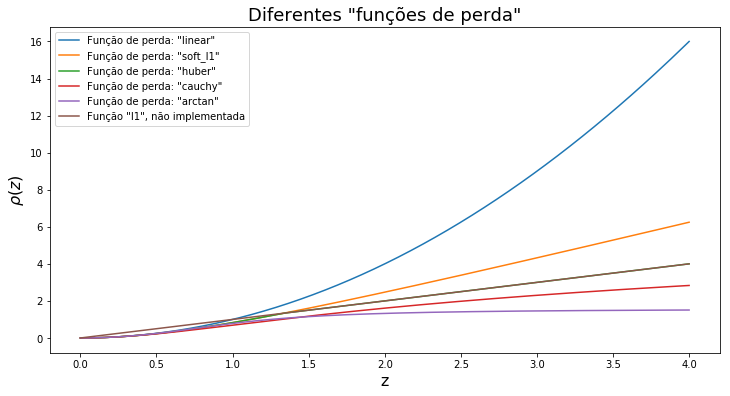

In [10]:
plt.figure(figsize=(12,6))
for perda in rho.keys():
    label = f'Função de perda: "{perda}"' if perda != "l1" else f'Função "{perda}", não implementada'
    plt.plot(z, rho[perda], label=label)
plt.xlabel('z', fontsize=16)
plt.ylabel(r'$\rho(z)$', fontsize=16)
plt.legend()
plt.title('Diferentes "funções de perda"', fontsize=18)
plt.show()

### Funções de ajuste no scipy.optimize

Temos, de início, três opções para implementar a minimização da soma do quadrado dos resíduos $\Delta_i = y_i - f_\beta(x_i)$, 

$$
  \text{minimizar } F(\beta) = \frac{1}{2} \sum_i \rho\left(\left(y_i - f_\beta(x_i)\right)\right)^2, \; \text{com uma restrição} \; l_\beta \leq \beta \leq u_\beta.
$$

- Usar a função `minimize`, que é mais flexível, mas devemos escrever explicitamente a função objetivo $F(\beta)$, que pode ser da forma acima ou diferente.

- Usar a função `least_squares`, onde passamos explicitamente a escolha de $\rho$ e um vetor com os resíduos $\Delta_i$, que podem ser $y_i - f_\beta(x_i)$ ou diferente. 

- Usar a função `curve_fit`, onde definimos $\rho$ e passamos separadamente a função de ajuste $f_\beta$ e os dados $x_i$, $y_i$, para que a função `curve_fit` monte a função objetivo $F(\beta)$ e chame a função `least_squares` para fazer o ajuste.

### Métodos de otimização das funções

Os métodos de otimização da função `minimize` foram mencionados acima.

Os métodos das funções `least_squares` e `curve_fit` são

- `"trf"` : Trust Region Reflective algorithm, particularly suitable for large sparse problems with bounds. Generally robust method. *Default if bounds are given.*

- `"dogbox"` : dogleg algorithm with rectangular trust regions, typical use case is small problems with bounds. Not recommended for problems with rank-deficient Jacobian.

- `"lm"` : Levenberg-Marquardt algorithm as implemented in MINPACK. Doesn’t handle bounds and sparse Jacobians. Usually the most efficient method for small unconstrained problems. *Default if bounds are not given*.

### Exemplo sintético

Vamos construir dados sintéticos próximos de uma reta, como feito na primeira aula.

In [11]:
num_points, m, c = 10, 0.5, 1.2
np.random.seed(14736122)
x = np.array(range(num_points)) + 0.1*np.random.randn(num_points)
y = c*np.ones(num_points) + m*x + 0.5*np.random.randn(num_points)

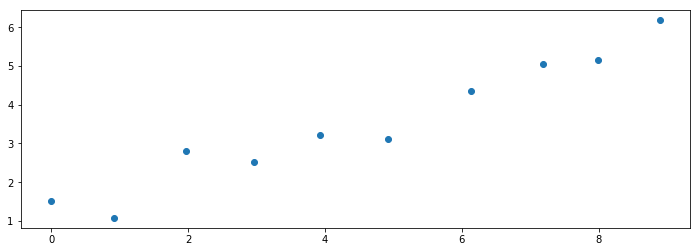

In [12]:
plt.figure(figsize=(12,4))
plt.plot(x, y, 'o')
plt.show()

### Implementações

In [13]:
# lstsq do numpy
A_np = np.vstack([x,np.ones(num_points)]).T
m_np, c_np = np.linalg.lstsq(A_np, y, rcond=None)[0]

# curve_fit do scipy
def f(x, m, c):
    return m*x+c
m_cf, c_cf = sp.optimize.curve_fit(f, x, y)[0]

# least_squares do scipy
def residuo(a, x, y):
   return f(x,a[0],a[1]) - y
m_ls, c_ls = sp.optimize.least_squares(residuo, [1.1,0.0], args=(x,y)).x

# minimize do scipy

def objetivo(a, x, y):
    return np.linalg.norm(residuo(a,x,y))**2
m_mn, c_mn = sp.optimize.minimize(objetivo, [1.1,0.0], args=(x,y)).x

### Resultados

In [14]:
print(m_np, c_np)
print(m_cf,c_cf)
print(m_ls, c_ls)
print(m_mn, c_mn)

0.5259450956728483 1.133330371990954
0.5259450943918303 1.1333303818176867
0.5259450954708331 1.1333303730010118
0.5259451160016281 1.1333302841813313


### Função de perda e outliers

Nas funções do scipy, o *default* é uma função de perda linear. 

Na presença de *outliers*, podemos tentar identificar e remover esses outliers ou diminuir a influência deles.

A função de perda implementa essa segunda opção.

Vamos incluir dois outliers no exemplo anterior e variar a função de perda.

### Incluindo outliers

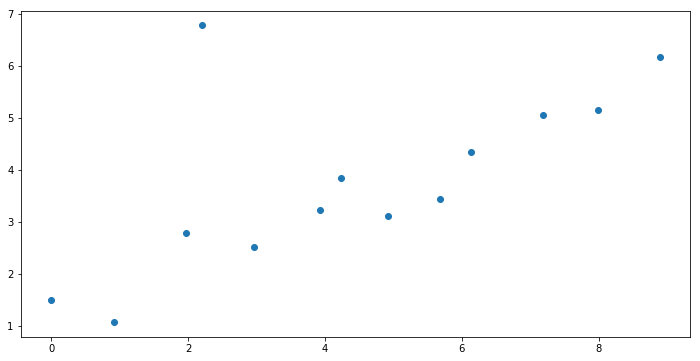

In [15]:
np.random.seed(57536119)
x_a = np.append(x, np.array([2, 4, 6]) +0.2*np.random.randn(3))
y_a = np.append(y, c*np.ones(3) + m*x_a[-4:-1] + 3*np.random.randn(3))

plt.figure(figsize=(12,6))
plt.plot(x_a, y_a, 'o')
plt.show()

### Ajustando com diferentes funções de perda

In [16]:
funcoes_de_perda = ["linear", "soft_l1", "huber", "cauchy", "arctan"]

params = dict()
for perda in funcoes_de_perda:
    params.update({perda: sp.optimize.least_squares(residuo, [1.1,0.0], 
                                                    args=(x_a,y_a), 
                                                    loss = perda).x})
x_ext = np.linspace(0,10, 200)
y_ext = dict()
for perda in funcoes_de_perda:
    y_ext.update({perda: f(x_ext, *params[perda])})

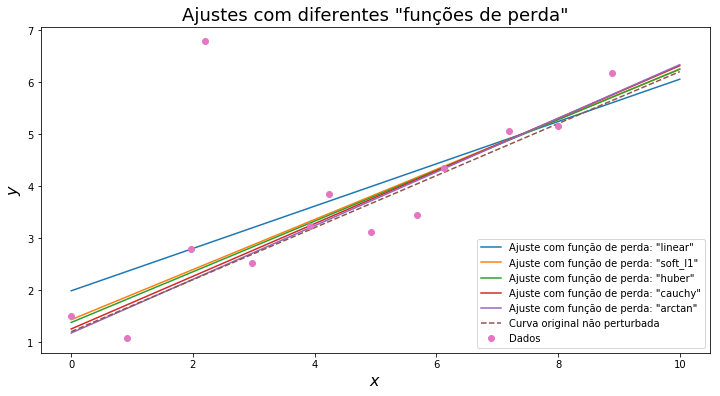

In [17]:
plt.figure(figsize=(12,6))
for perda in funcoes_de_perda:
    plt.plot(x_ext, y_ext[perda], label=f'Ajuste com função de perda: "{perda}"')
plt.plot(x_ext, f(x_ext, m, c), '--', label='Curva original não perturbada')
plt.plot(x_a, y_a, 'o', label='Dados')
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)
plt.legend()
plt.title('Ajustes com diferentes "funções de perda"', fontsize=18)
plt.show()

## Exercícios

1. Refaça os ajustes da [Aula 6](06.00-Aula6.ipynb) diretamente como ajustes não lineares, com as funções acima.

---

### Apresentação em slides

Para visualizar na forma de slides, abrir um "terminal" *bash* e usar a linha de comando
```bash
jupyter nbconvert 07.00-Aula7.ipynb --to slides --post serve
```

Se quiser adicionar a possibilidade de rolar a página, caso algum *slide* seja muito longo, incluir a opção
```bash
--SlidesExporter.reveal_scroll=True
```

Para usar um tema diferente do padrão, temos a configuração via `SlidesExporter.reveal_theme`. Os temas disponíveis são `beige`, `black`, `blood`, `league`, `moon`, `night`, `serif`, `simple`, `sky`, `solarized`, `white`. O padrão é `white`. Um tema interessante é
```bash
--SlidesExporter.reveal_theme=solarized
```

Para usar um efeito de transição diferente do padrão, temos a configuração via `SlidesExporter.reveal_transition`. As opções são `none`, `fade`, `slide`, `convex`, `concave` e `zoom`. O padrão é `slide`. Uma transição interessante é 
```bash
--SlidesExporter.reveal_transition=convex
```

Mais informações sobre o `nbconvert` em [Configuration options (for nbconvert)](https://nbconvert.readthedocs.io/en/latest/config_options.html) e [Present Your Data Science Projects with Jupyter Notebook Slides!](https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f)

<!--NAVIGATOR-->

---
[<- Aula 6: Regressão semi-linear, ajustes de ordem mais alta e critérios de seleção do ajuste](06.00-Aula6.ipynb) | [Página Inicial](00-Sumario.ipynb) | [Aula 8: O pêndulo com ângulos grandes, um pouco de EDO e simulações ->](08.00-Aula8.ipynb)

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/07.00-Aula7.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/07.00-Aula7.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>

<a href="https://rmsrosa.github.io/modelagem_matematica/aulas/07.00-Aula7.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;